In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer,Conv2D,MaxPool2D,UpSampling2D,\
Conv2DTranspose,Cropping2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint

from Autoencoder import *
from make_video import *

import cv2
import os

In [6]:
p_old=os.getcwd()

In [7]:
p= r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Bicycle_Frames'
p = p.replace('\\','/')
os.chdir(p)

In [8]:
os.getcwd()

'C:\\Users\\saad\\Desktop\\Autoencoders\\Videos\\Results\\Bicycle_Frames'

In [9]:
path = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset'
vid_name = 'Bicycle_Sequence.mp4'

In [11]:
names,fps,width,height=read_video(os.getcwd(),os.path.join(path,vid_name))

Loading Video...
Completed


In [12]:
print(f'The fps is {fps}, The width of the frame is {width} and the height of the frame is {height}')

The fps is 25.0, The width of the frame is 3840 and the height of the frame is 2160


In [13]:
images = np.array(read_imgs(os.getcwd(),names,2,640,480))
images = images.astype('float32')/255.
print(f'The shape of the images is {images.shape}')

The shape of the images is (224, 480, 320, 3)


In [14]:
img_shape = images.shape[1:]
print(img_shape)

(480, 320, 3)


In [15]:
model1,model2 = build_autoencoder(img_shape,512,'Hi-Res',None)

In [17]:
weights = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Weights'
weights = weights.replace('\\','/')


In [18]:
model1.load_weights(os.path.join(weights,'model1.hdf5'))
model2.load_weights(os.path.join(weights,'model2.hdf5'))

In [19]:
img_new = model1.predict(images)

In [20]:
img_new.shape

(224, 480, 320, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


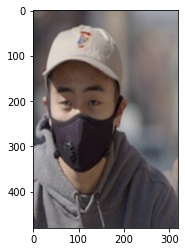

In [39]:
import matplotlib.pyplot as plt
plt.imshow(img_new[75,:,:,:])

In [26]:
from tqdm import tqdm
import numpy as np
preds=[]
for i in tqdm(range(len(img_new))):
    preds.append(model2.predict(np.expand_dims(img_new[i],axis=0)))

100%|████████████████████████████████████████████████████████████████████████████████| 224/224 [00:08<00:00, 26.64it/s]


In [27]:
pr = np.array(preds)
pr.shape

(224, 1, 480, 320, 3)

In [28]:
pr= pr.reshape(224,480,320,3)

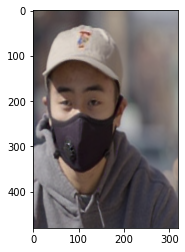

In [40]:
plt.imshow(pr[75,:,:,:])

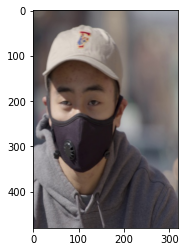

In [41]:
plt.imshow(images[75,:,:,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


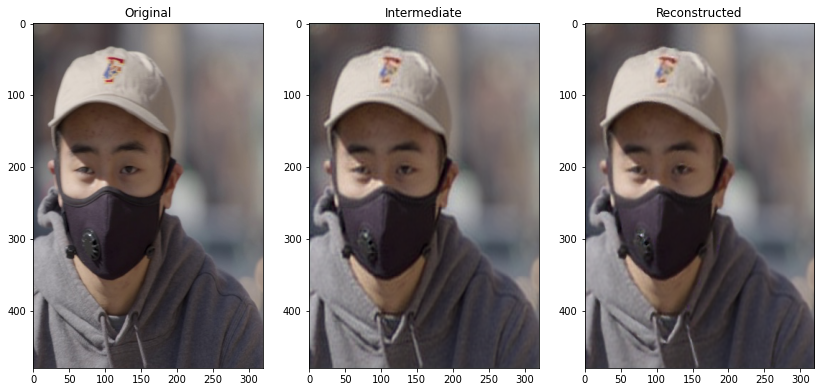

In [44]:
plt.figure(figsize=(14,10))

plt.subplot(131)
plt.imshow(images[75,:,:,:])
plt.title('Original')

plt.subplot(132)
plt.imshow(img_new[75,:,:,:])
plt.title('Intermediate')

plt.subplot(133)
plt.imshow(pr[75,:,:,:])
plt.title('Reconstructed')

plt.show()